In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import numpy as np  
%matplotlib inline

In [2]:
image=cv2.imread('./test/msd.jpg')
image.shape

(225, 225, 3)

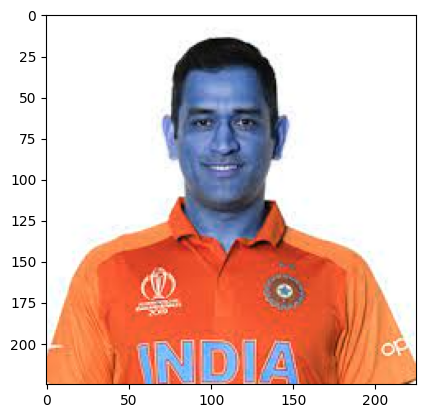

In [3]:
plt.imshow(image, cmap='gray')

In [4]:
gray_img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img.shape

(225, 225)

In [5]:
gray_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [135, 135, 136, ..., 113,  92, 102],
       [135, 135, 136, ...,  85, 164, 246],
       [234, 195, 142, ..., 229, 253, 254]], dtype=uint8)

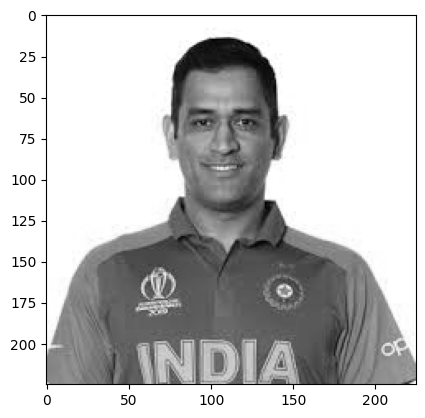

In [6]:
plt.imshow(gray_img, cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier(".\OpenCv\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(".\OpenCv\haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(gray_img,1.3,5)
faces

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\palla\AppData\Local\Temp\ipykernel_11224\330687748.py:1: SyntaxWarning: invalid escape sequence '\O'
  face_cascade=cv2.CascadeClassifier(".\OpenCv\haarcascade_frontalface_default.xml")
C:\Users\palla\AppData\Local\Temp\ipykernel_11224\330687748.py:2: SyntaxWarning: invalid escape sequence '\O'
  eye_cascade=cv2.CascadeClassifier(".\OpenCv\haarcascade_eye.xml")


array([[72, 37, 72, 72]])

In [8]:
(x,y,w,h)=faces[0]

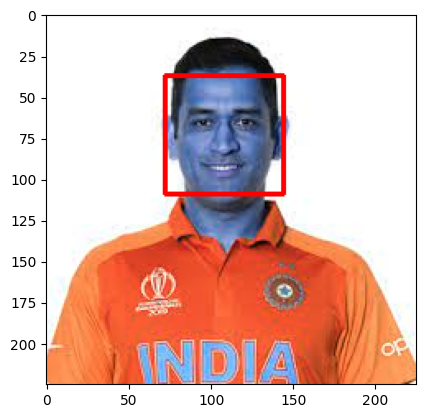

In [9]:
face_img=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

<function matplotlib.pyplot.show(close=None, block=None)>

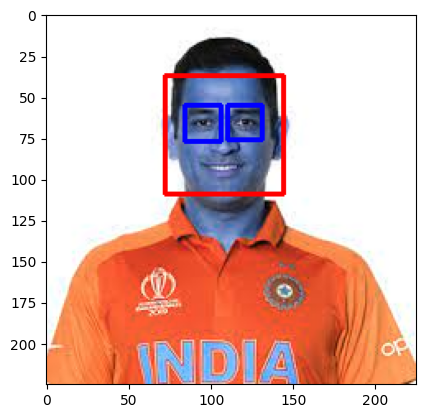

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray_img[y:y+h, x:x+w]
    roi_color=face_img[y:y+h, x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew ,ey+eh),(0,0,255),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show

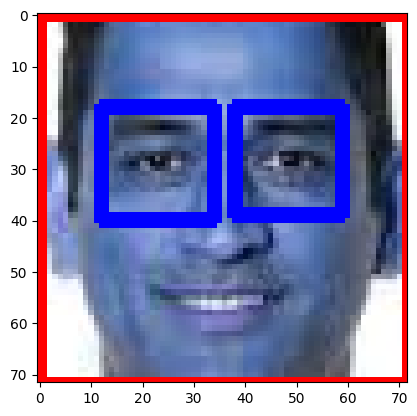

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image(image):
    image_i=cv2.imread(image)
    gray_image_i=cv2.cvtColor(image_i,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray_image_i,1.3,5)
    for (x,y,w,h) in faces:
           roi_gray= gray_image_i[y:y+h, x:x+w]
           roi_color=image_i[y:y+h, x:x+w]
           eyes=eye_cascade.detectMultiScale(roi_gray)
           if len(eyes) >=2:
                 return roi_color

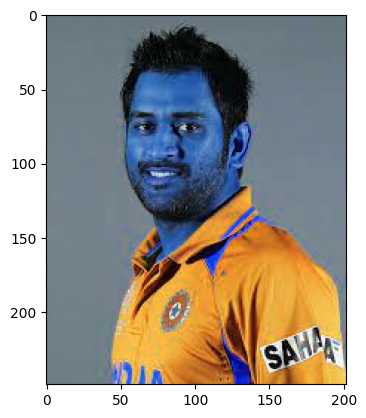

In [13]:
original_image=cv2.imread("./Dataset/MS Dhoni/download (1).jpg")
plt.imshow(original_image)

array([[[110, 125, 134],
        [110, 125, 134],
        [110, 125, 134],
        ...,
        [  7,   9,  10],
        [  6,  10,  11],
        [  0,   3,   3]],

       [[110, 125, 134],
        [110, 125, 134],
        [110, 125, 134],
        ...,
        [  7,   9,  10],
        [  6,  10,  11],
        [  7,  12,  13]],

       [[109, 124, 133],
        [109, 124, 133],
        [109, 124, 133],
        ...,
        [  8,  10,  11],
        [  8,  10,  11],
        [  5,  10,   9]],

       ...,

       [[115, 130, 139],
        [115, 130, 139],
        [115, 130, 139],
        ...,
        [245, 149,  49],
        [239, 145,  46],
        [227, 149,  48]],

       [[115, 130, 139],
        [115, 130, 139],
        [115, 130, 139],
        ...,
        [239, 142,  54],
        [228, 136,  55],
        [211, 135,  69]],

       [[115, 130, 139],
        [115, 130, 139],
        [115, 130, 139],
        ...,
        [224, 132,  59],
        [220, 133,  69],
        [196, 128,  75]]

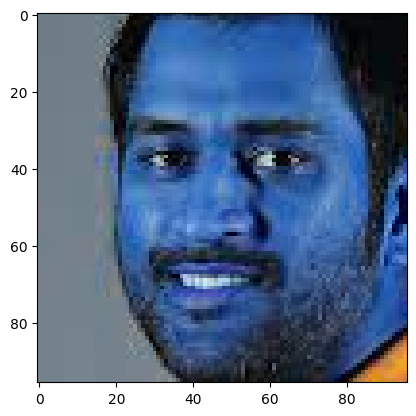

In [14]:
cropped_image=get_cropped_image("./Dataset/MS Dhoni/download (1).jpg")
plt.imshow(cropped_image)
cropped_image

In [15]:
#creating new folder for storing cropped images
path_data= "./dataset/"
path_to_cropped="./dataset/Cropped"

In [16]:
import os
image_directories=[]#list to store paths
for i in os.scandir(path_data):
    if i.is_dir():
        image_directories.append(os.path.join(path_data,i.name))
image_directories

['./dataset/Lionel Messi',
 './dataset/MS Dhoni',
 './dataset/Sachin',
 './dataset/Viratkohli']

In [17]:
import shutil
if os.path.exists(path_to_cropped):
    shutil.rmtree(path_to_cropped)
os.mkdir(path_to_cropped)

In [18]:
cropped_image_dirs=[]
celebrity_file_names={}
for dir in image_directories:
    count=1
    celebrity_name=dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names[celebrity_name]=[]

    for entry in os.scandir(dir):
        Roi_color=get_cropped_image(entry.path)
        if Roi_color is not None:
            cropped_folder=path_to_cropped + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name= celebrity_name + str(count) + ".png"
            cropped_file_path= cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path,Roi_color)
            celebrity_file_names[celebrity_name].append(cropped_file_path)
            count = count + 1

    


Lionel Messi
Generating cropped images in folder:  ./dataset/CroppedLionel Messi
MS Dhoni
Generating cropped images in folder:  ./dataset/CroppedMS Dhoni
Sachin
Generating cropped images in folder:  ./dataset/CroppedSachin
Viratkohli
Generating cropped images in folder:  ./dataset/CroppedViratkohli


In [19]:
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [20]:
def w2d(image, mode='haar', level=1):
    image_array=image
    image_array=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_array=np.float32(image_array)
    image_array/= 255
    coeffecients=pywt.wavedec2(image_array,mode,level=level)
    coeffecients_H=list(coeffecients)
    coeffecients_H[0]*=255
    image_array_H=pywt.waverec2(coeffecients_H,mode)
    image_array_H*=255
    image_array_H=np.uint8(image_array_H)
    return image_array_H





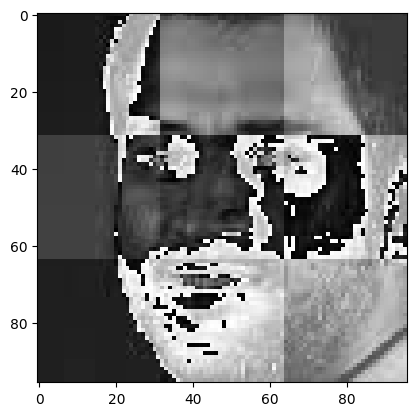

In [21]:
image_haar=w2d(cropped_image,'db1',5)
plt.imshow(image_haar,cmap='gray')

In [22]:
encoded_celebrity_names={}
count=1
for celebrity_name in celebrity_file_names.keys():
    encoded_celebrity_names[celebrity_name]=count
    count= count+1
encoded_celebrity_names

{'Lionel Messi': 1, 'MS Dhoni': 2, 'Sachin': 3, 'Viratkohli': 4}

In [23]:
X,Y=list(),list()
for celebrity_name, train_files in celebrity_file_names.items():
    for train_image in train_files:
        image=cv2.imread(train_image)
        if image is None:
            continue
        scaled_rawImage=cv2.resize(image,(32,32))
        image_haar=w2d(image,'db1',5)
        scaled_image_haar=cv2.resize(image_haar, (32,32))
        #vertical stacking using numpy functions
        combined_img=np.vstack((scaled_rawImage.reshape(32*32*3,1), scaled_image_haar.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(encoded_celebrity_names[celebrity_name])


In [24]:
len(X[0]),len(Y)


(4096, 99)

In [25]:
X=np.array(X).reshape(len(X),4096).astype(float)
X[0]

array([100., 129., 140., ...,  40.,  34.,  32.])

In [26]:
#Model Training
#SVM
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=5)
len(x_train), len(y_train)


(79, 79)

In [27]:
#pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
pipeline= Pipeline([('scaler', StandardScaler()), ('svc', SVC( kernel='rbf',C=10))])
pipeline.fit(x_train,y_train)
pipeline.score(x_test,y_test)
y_pred=pipeline.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.70      1.00      0.82         7

    accuracy                           0.80        20
   macro avg       0.40      0.45      0.42        20
weighted avg       0.74      0.80      0.76        20



c:\Users\palla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [38]:
Model_parameters = {
    'SVM': {
        'model': SVC(gamma='auto', probability=True),
        'parameters': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'Randomforest': {
        'model': RandomForestClassifier(),
        'parameters': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'Logisticregression': {
        'model': LogisticRegression(),
        'parameters': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [40]:
import pandas as pd
scores = []
best_estimators = {}

for algo, model in Model_parameters.items():
    pipeline_1 = make_pipeline(StandardScaler(), model['model'])
    gridsearch = GridSearchCV(pipeline_1, model['parameters'], cv=5, return_train_score=False)
    gridsearch.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': gridsearch.best_score_,
        'best_parameters': gridsearch.best_params_
    })
    best_estimators[algo] = gridsearch.best_estimator_

dataframe = pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters'])
print(dataframe)

c:\Users\palla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\palla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\palla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


                model  best_score  \
0                 SVM    0.848333   
1        Randomforest    0.785000   
2  Logisticregression    0.848333   

                                best_parameters  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 5}  


In [45]:
best_estimators['SVM'].score(x_test,y_test), best_estimators['Randomforest'].score(x_test,y_test), best_estimators['Logisticregression'].score(x_test,y_test)

(0.7, 0.75, 0.7)

In [48]:
best_clf=best_estimators['SVM']
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test, best_clf.predict(x_test))
cfm


array([[9, 0, 0, 2],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [2, 0, 0, 5]], dtype=int64)

<Axes: >

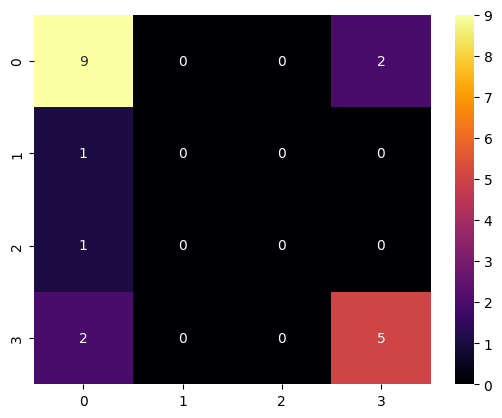

In [52]:
sns.heatmap(cfm, annot=True, cmap='inferno')

Saving model in pickel file

In [53]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')


['saved_model.pkl']

In [56]:
encoded_celebrity_names

{'Lionel Messi': 1, 'MS Dhoni': 2, 'Sachin': 3, 'Viratkohli': 4}

In [58]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(encoded_celebrity_names))